In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence 
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import dill as pickle
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.covariance import EmpiricalCovariance
from sklearn.preprocessing import label_binarize

In [6]:
nm = pd.read_pickle("data/rev_df_before_dummies.pkl")

In [7]:
col_lst = list(nm.columns)

In [8]:
nm.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2047618 entries, 0 to 3986667
Data columns (total 13 columns):
CAD_Event_Number     int64
Force_Level          object
Precinct             object
Sector               object
Beat                 object
Subject_Race         object
Subject_Gender       object
Call_Type            object
Initial_Call_Type    object
month                int64
day                  int64
day_of_week          int64
hour                 int64
dtypes: int64(5), object(8)
memory usage: 218.7+ MB


In [10]:
forces = nm.groupby("Force_Level")

In [18]:
forces.count().iloc[:,1].values

array([2035580,    8953,    2852,      90,     143])

In [23]:
forces.count().index

Index([                       0, 'Level 1 - Use of Force',
       'Level 2 - Use of Force',          'Level 3 - OIS',
       'Level 3 - Use of Force'],
      dtype='object', name='Force_Level')

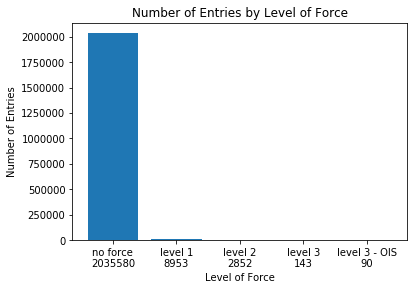

In [34]:
plt.bar(["no force\n2035580", "level 1\n8953", "level 2\n2852", "level 3\n143", "level 3 - OIS\n90"], forces.count().iloc[:,1].values)
plt.xlabel("Level of Force")
plt.ylabel("Number of Entries")
plt.title("Number of Entries by Level of Force");

plt.savefig("imbalanced classes.jpg")
